In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import hsv_to_rgb
import cmath

In [2]:
class DColor:
    def __init__(self, samples=3500, xmin=-10, xmax=10, ymin=-10, ymax=10):
        #plot settings
        self._samples = samples
        #axes
        self._xmin = xmin
        self._xmax = xmax
        self._ymin = ymin
        self._ymax = ymax
        self.makeDomain()

    def makeDomain(self):
        """Create the domains for Real (x) and Imaginary (y) values respectively"""
        x = np.linspace(self._xmin, self._xmax, self._samples)
        y = np.linspace(self._ymin, self._ymax, self._samples)
        self.xx, self.yy=np.meshgrid(x,y)

    def makeColorModel(self, zz):
        """Create the HSV color model for the function domain that will be plotted"""
        H = self.normalize(np.angle(zz) % (2. * np.pi)) #Hue determined by arg(z)
        r = np.log2(1. + np.abs(zz))
        S = (1. + np.abs(np.sin(2. * np.pi * r))) / 2.
        V = (1. + np.abs(np.cos(2. * np.pi * r))) / 2.

        return H,S,V

    def normalize(self, arr):
        """Used for normalizing data in array based on min/max values"""
        arrMin = np.min(arr)
        arrMax = np.max(arr)
        arr = arr - arrMin
        return arr / (arrMax - arrMin)

    def plot(self, f, xdim=10, ydim=8, plt_dpi=100):
        """Plot a complex-valued function
            Arguments:
            f -- a (preferably) lambda-function defining a complex-valued function
            Keyword Arguments:
            xdim -- x dimensions
            ydim -- y dimensions
            plt_dpi -- density of pixels per inch
        """
        zz=f(self.z(self.xx,self.yy))
        H,S,V = self.makeColorModel(zz)
        rgb = hsv_to_rgb(np.dstack((H,S,V)))

        fig = plt.figure(figsize=(xdim, ydim), dpi=plt_dpi)
        plt.imshow(rgb)
        plt.gca().invert_yaxis() #make CCW orientation positive
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
        plt.show()

    def z(self, x, y):
        """return complex number x+iy
            If inputs are arrays, then it returns an array with corresponding x_j+iy_j values
        """
        return x+1j*y
    

In [10]:
dc = DColor(xmin=-2, xmax=2, ymin=-2, ymax=2, samples=4000)

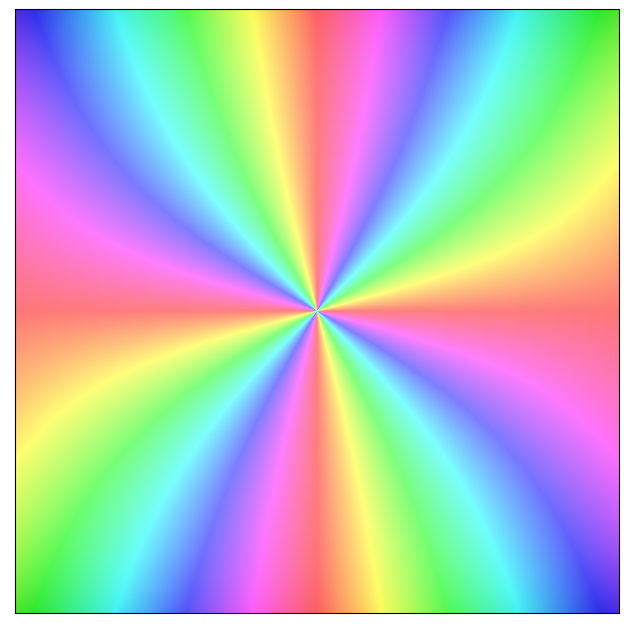

In [11]:
dc.plot(lambda z : 0.5*np.sin(0.25*z*np.sin(0.125*z*np.sin(0.0625*z*np.sin(z)))))